In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
from modules import analysis
import datetime as dt

In [20]:
analysis_frame = analysis.get()
analysis_frame

loading data from date 2021-02-09 : file 20210209_cmt.xlsx...


,date,state,money recieved,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests,timestamp
0,2020-02-14,New Jersey,1.523121e+08,0.0,0.0,0.0,0.0,0.0,0.0,0,1581638400
1,2020-03-06,Massachusetts,3.804038e+07,0.0,0.0,0.0,0.0,0.0,0.0,33,1583452800
2,2020-03-11,Minnesota,9.885580e+05,21.0,217.0,0.0,0.0,0.0,0.0,0,1583884800
3,2020-03-12,Maryland,5.981910e+05,12.0,94.0,0.0,0.0,0.0,0.0,0,1583971200
4,2020-03-13,California,5.613300e+05,202.0,916.0,0.0,0.0,4.0,0.0,0,1584057600
...,...,...,...,...,...,...,...,...,...,...,...
1669,2021-02-09,Virginia,1.115687e+09,534116.0,0.0,0.0,42199.0,6898.0,22339.0,656736,1612828800
1670,2021-02-09,Washington,1.148048e+09,323214.0,4464543.0,0.0,0.0,4451.0,18480.0,307163,1612828800
1671,2021-02-09,West Virginia,4.588345e+08,125522.0,1906759.0,0.0,108616.0,2150.0,0.0,0,1612828800
1672,2021-02-09,Wisconsin,8.926249e+08,602256.0,2541584.0,0.0,531343.0,6663.0,25021.0,0,1612828800


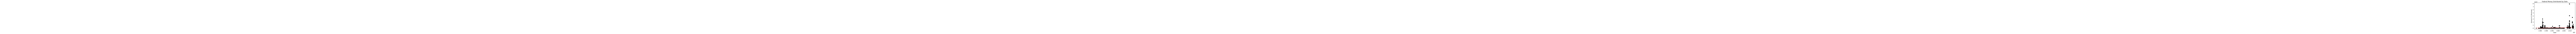

In [96]:
analysis.regression_plot(analysis_frame, 'date_rgression', ['Federal Money Distributed by Date', 'Date', 'Amount of $ Recieved'], 'timestamp', 'money recieved', 'black', 'red', 'red', analysis_frame['timestamp'].median(), analysis_frame['money recieved'].max())

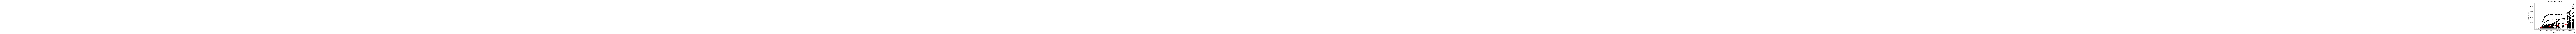

In [9]:
analysis.regression_plot(analysis_frame, 'date_rgression', ['Covid Deaths by Date', 'Date', 'Covid Deaths'], 'timestamp', 'death', 'black', 'red', 'red', analysis_frame['timestamp'].median(), analysis_frame['death'].max())

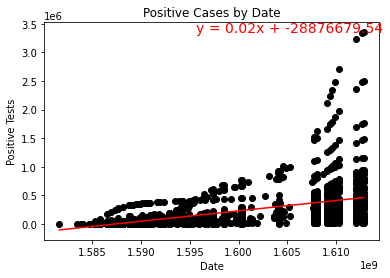

In [8]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Positive Cases by Date', 'Date', 'Positive Tests'], 'timestamp', 'positive', 'black', 'red', 'red', analysis_frame['timestamp'].median(), analysis_frame['positive'].max())

In [94]:
import operator
frame = analysis_frame.drop(['state','date'], axis=1)
correlations = {}
for column1 in frame:
    for column2 in frame:
        cor = analysis_frame[column1].corr(analysis_frame[column2])
        if abs(cor) > 0.5 and abs(cor) != 1 and column1 != column2 and column1 != 'timestamp' and column2 != 'timestamp':
            correlations[f'{column1} by {column2}'] = cor
            print(f'Correlation between {column1} and {column2}: {str(cor)}')
max1 = ['key',0]
max2 = ['key',0]
max3 = ['key',0]
for key in correlations:
    if abs(correlations[key]) > abs(max1[1]):
        max1[1] = correlations[key]
        max1[0] = key
    elif abs(correlations[key]) > abs(max2[1]) and abs(correlations[key]) < abs(max1[1]):
        max2[1] = correlations[key]
        max2[0] = key
    elif abs(correlations[key]) > abs(max3[1]) and abs(correlations[key] < max2[1]):
        max3[1] = correlations[key]
        max3[0] = key
print('')
print(f'1) {max1[0]}          = {max1[1]}')
print(f'2) {max2[0]}      = {max2[1]}')
print(f'3) {max3[0]} = {max3[1]}')

Correlation between positive and recovered: 0.5496802694132596
Correlation between positive and death: 0.8424292417674357
Correlation between positive and positiveTests: 0.5973617161429529
Correlation between recovered and positive: 0.5496802694132596
Correlation between recovered and positiveTests: 0.6150749731530506
Correlation between death and positive: 0.8424292417674357
Correlation between death and hospitalized: 0.6809103302463475
Correlation between hospitalized and death: 0.6809103302463475
Correlation between positiveTests and positive: 0.5973617161429529
Correlation between positiveTests and recovered: 0.6150749731530506

1) positive by death          = 0.8424292417674357
2) death by hospitalized      = 0.6809103302463475
3) positiveTests by recovered = 0.6150749731530506


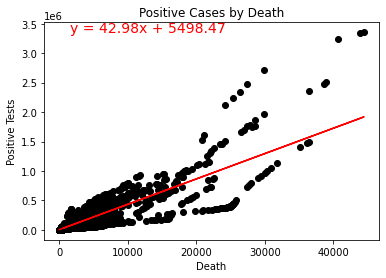

In [58]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Positive Cases by Death', 'Death', 'Positive Tests'], 'death', 'positive', 'black', 'red', 'red', analysis_frame['death'].median(), analysis_frame['positive'].max())

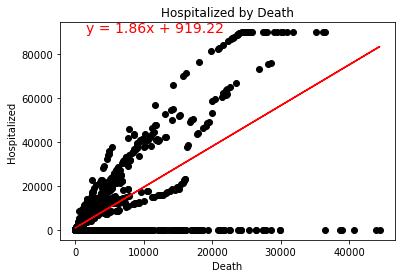

In [95]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Hospitalized by Death', 'Death', 'Hospitalized'], 'death', 'hospitalized', 'black', 'red', 'red', analysis_frame['death'].median(), analysis_frame['hospitalized'].max())

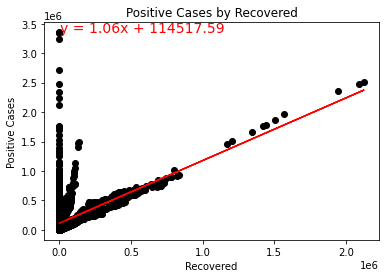

In [71]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Positive Cases by Recovered', 'Recovered', 'Positive Cases'], 'recovered', 'positive', 'black', 'red', 'red', analysis_frame['recovered'].median(), analysis_frame['positive'].max())

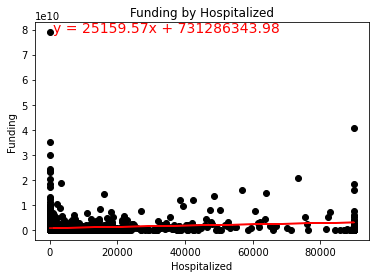

In [73]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Funding by Hospitalized', 'Hospitalized', 'Funding'], 'hospitalized', 'money recieved', 'black', 'red', 'red', analysis_frame['hospitalized'].median(), analysis_frame['money recieved'].max())

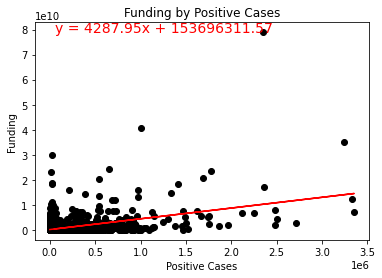

In [74]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Funding by Positive Cases', 'Positive Cases', 'Funding'], 'positive', 'money recieved', 'black', 'red', 'red', analysis_frame['positive'].median(), analysis_frame['money recieved'].max())

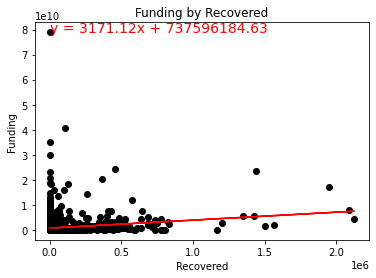

In [75]:
analysis.regression_plot(analysis_frame, 'date_regression', ['Funding by Recovered', 'Recovered', 'Funding'], 'recovered', 'money recieved', 'black', 'red', 'red', analysis_frame['recovered'].median(), analysis_frame['money recieved'].max())